**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


## Import data

In [2]:
PREFIX = "KS91_K562_ASTARRseq"
FOLDER = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, PREFIX, FOLDER, "summary")
fname = "wgs_summary_combine.tsv"
fpath = file.path(fdiry, fname)

dat_cov_astarr = read_tsv(fpath, show_col_types = FALSE)
head(dat_cov_astarr)

Peak,Input,Output,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_10015_10442,0.4863317,0.09736537,71.40375,-2.2136128,0.2691517,-8.2244060,1.961605e-16,2.910689e-15
chr1_14253_14645,0.3152472,0.27902967,68.63035,0.2221859,0.1534101,1.4483134,1.475294e-01,2.178106e-01
chr1_16015_16477,0.4361424,0.15900628,71.25409,-1.2712950,0.2019628,-6.2946978,3.079993e-10,2.653010e-09
chr1_17237_17772,0.8007562,0.22194085,124.03128,-1.3852891,0.1638628,-8.4539594,2.815873e-17,4.431894e-16
chr1_28903_29613,0.7629703,0.16679463,113.63103,-1.9422003,0.1886131,-10.2972733,7.248682e-25,1.723665e-23
chr1_30803_31072,0.2774187,0.21678565,57.37875,-0.1332069,0.2145692,-0.6208109,5.347240e-01,6.231400e-01


In [3]:
PREFIX = "A001_K562_WSTARRseq"
FOLDER = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, PREFIX, FOLDER, "summary")
fname = "wgs_summary_combine.tsv"
fpath = file.path(fdiry, fname)

dat_cov_wstarr = read_tsv(fpath, show_col_types = FALSE)
head(dat_cov_wstarr)

Peak,Input,Output,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_17237_17772,0.15110814,0.11357287,15.507847,-0.55197423,0.3650312,-1.5121288,0.1305011090,0.376522564
chr1_136071_137429,0.06365512,0.07982534,8.005396,0.42184778,0.5134014,0.8216725,0.4112633282,NA
chr1_137737_139544,0.44687760,0.82692790,68.388785,0.75905245,0.1909129,3.9759105,0.0000701105,0.001384044
chr1_180982_182087,0.27787742,0.35228528,35.093278,0.19192129,0.2417529,0.7938737,0.4272689717,0.696317984
chr1_183239_184602,0.40955815,0.47205688,49.565727,0.08374879,0.2018363,0.4149342,0.6781900855,0.857342193
chr1_186238_187159,0.44822499,0.43369525,50.450003,-0.13877450,0.2161170,-0.6421267,0.5207908905,0.763065578


In [5]:
PREFIX = "Tewhey_K562_TileMPRA"
FOLDER = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, PREFIX, FOLDER, "summary")
fname = "Tewhey_K562_TileMPRA_summary.stranded_pos.tsv"
fpath = file.path(fdiry, fname)

fun = function(x){(x - mean(x))/(sd(x))}
dat_cov_tmpra = read_tsv(fpath, show_col_types = FALSE) %>% mutate(stat = fun(log2FoldChange))
head(dat_cov_tmpra)

Chrom,Start,End,Peak,Region,Input,Output,log2FoldChange,stat
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr11,61792068,61793464,chr11_61792068_61793464,FADS,245,3157,3.6877006,1.45018851
chr11,61800085,61801113,chr11_61800085_61801113,FADS,250,3715,3.8933622,1.60239098
chr11,61806630,61807154,chr11_61806630_61807154,FADS,373,587,0.6541849,-0.79480313
chr11,61814735,61817343,chr11_61814735_61817343,FADS,215,5053,4.5547316,2.09184576
chr11,61822094,61822443,chr11_61822094_61822443,FADS,252,293,0.2174769,-1.11799436
chr11,61825795,61826306,chr11_61825795_61826306,FADS,182,565,1.6343124,-0.06944736


In [6]:
fdiry = file.path(FD_RES, "region", "KS91_K562_astarrseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.ccre_all.freq.tsv"
fpath = file.path(fdiry, fname)

dat_freq_ccre = read_tsv(fpath, show_col_types = FALSE)
head(dat_freq_ccre)

Peak,Chrom,Start,End,Len,Label,Count,Total,Freq
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr1_100027983_100029702,chr1,100027983,100029702,1719,Low-DNase,1,1,1.0000000
chr1_100036871_100039191,chr1,100036871,100039191,2320,Low-DNase,2,6,0.3333333
chr1_100036871_100039191,chr1,100036871,100039191,2320,pELS,3,6,0.5000000
chr1_100036871_100039191,chr1,100036871,100039191,2320,PLS,1,6,0.1666667
chr1_100048234_100048985,chr1,100048234,100048985,751,Low-DNase,1,1,1.0000000
chr1_100049562_100050540,chr1,100049562,100050540,978,Low-DNase,1,1,1.0000000


In [7]:
print(unique(dat_freq_ccre$Label))

 [1] "Low-DNase"                "pELS"                    
 [3] "PLS"                      "dELS"                    
 [5] "PLS,CTCF-bound"           "pELS,CTCF-bound"         
 [7] "DNase-only"               "CTCF-only,CTCF-bound"    
 [9] "DNase-H3K4me3,CTCF-bound" "DNase-H3K4me3"           
[11] "dELS,CTCF-bound"         


## Merge fold change

In [8]:
dat = dat_freq_ccre  %>% 
    dplyr::select(Peak, Label, Freq) %>% 
    tidyr::spread(Label, Freq, fill = 0) %>% 
    dplyr::mutate(
        CTCF = `PLS,CTCF-bound` + `pELS,CTCF-bound` + `CTCF-only,CTCF-bound` + `DNase-H3K4me3,CTCF-bound` + `dELS,CTCF-bound`)

dat = dat %>% 
    gather(Label, Freq, -Peak) %>% 
    dplyr::filter(Freq != 0) %>% 
    distinct

dat_ccre = dat
print(dim(dat_ccre))
head(dat)

[1] 138211      3


Peak,Label,Freq
<chr>,<chr>,<dbl>
chr1_100459194_100460074,"CTCF-only,CTCF-bound",1.0
chr1_101288084_101289048,"CTCF-only,CTCF-bound",0.5
chr1_101357288_101357816,"CTCF-only,CTCF-bound",1.0
chr1_10152601_10153412,"CTCF-only,CTCF-bound",1.0
chr1_10337595_10338506,"CTCF-only,CTCF-bound",1.0
chr1_10493478_10495415,"CTCF-only,CTCF-bound",1.0


**Check**

In [9]:
dat = dat_ccre
print(dim(dat))
dat = dat 
print(dim(dat))

[1] 138211      3
[1] 138211      3


**Merge**

In [11]:
dat_sub_tmpra = dat_cov_tmpra %>% dplyr::filter(Region %in% c("GATA1", "MYC"))

dat1 = dat_cov_astarr %>% dplyr::select(Peak, log2FoldChange, stat) %>% dplyr::mutate(Assay="ASTARR")
dat2 = dat_cov_wstarr %>% dplyr::select(Peak, log2FoldChange, stat) %>% dplyr::mutate(Assay="WSTARR")
dat3 = dat_sub_tmpra  %>% dplyr::select(Peak, log2FoldChange, stat) %>% dplyr::mutate(Assay="TMPRA")
#dat4 = dat_ccre       %>% dplyr::select(Peak, Label)

dat  = bind_rows(dat1, dat2, dat3) %>% spread(Assay, stat) %>% na.omit
#dat  = inner_join(dat4, dat, by="Peak") %>% na.omit

dat_comb = dat
print(dim(dat))
head(dat)

[1] 385   4


Peak,ASTARR,TMPRA,WSTARR
<chr>,<dbl>,<dbl>,<dbl>
chr8_126778902_126779728,6.452641,1.0022040,-0.3274979
chr8_126782925_126783318,3.391168,-0.5812065,0.6613946
chr8_126804776_126805825,10.321241,0.9483322,2.7165548
chr8_126817018_126817490,-4.538480,-0.6903266,-1.9929862
chr8_126820465_126821393,-4.641915,-0.3665627,-1.0218835
chr8_126824093_126824987,3.590672,1.0405172,-1.7855205


In [13]:
library(pheatmap)

In [16]:
mat = dat_comb %>% column_to_rownames(var="Peak") %>% as.matrix
head(mat)

,ASTARR,TMPRA,WSTARR
chr8_126778902_126779728,6.452641,1.0022040,-0.3274979
chr8_126782925_126783318,3.391168,-0.5812065,0.6613946
chr8_126804776_126805825,10.321241,0.9483322,2.7165548
chr8_126817018_126817490,-4.538480,-0.6903266,-1.9929862
chr8_126820465_126821393,-4.641915,-0.3665627,-1.0218835
chr8_126824093_126824987,3.590672,1.0405172,-1.7855205


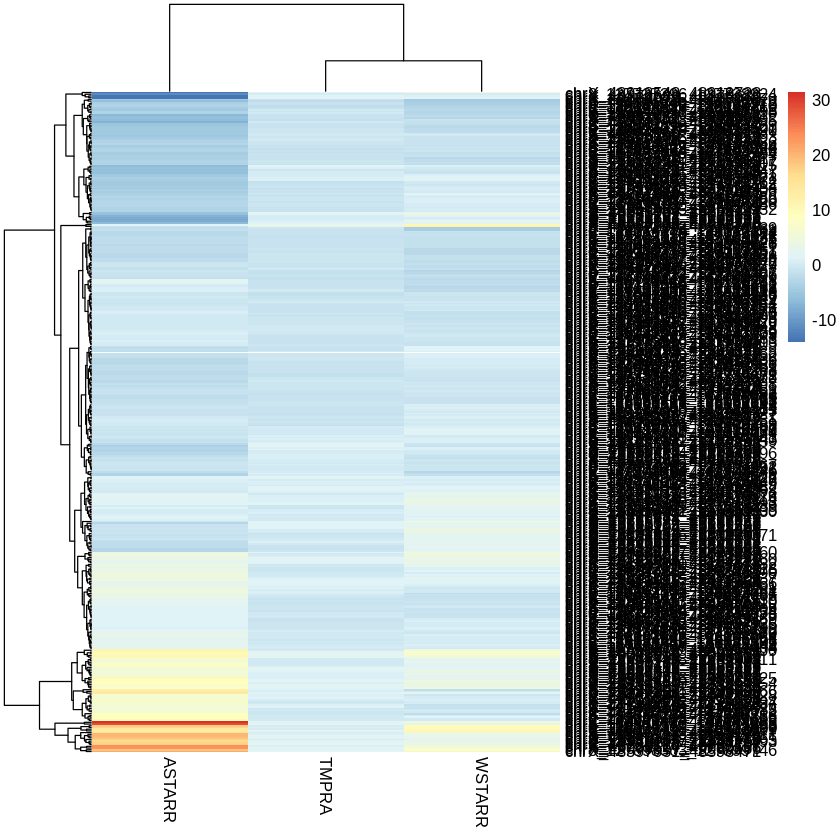

In [17]:
pheatmap(mat)

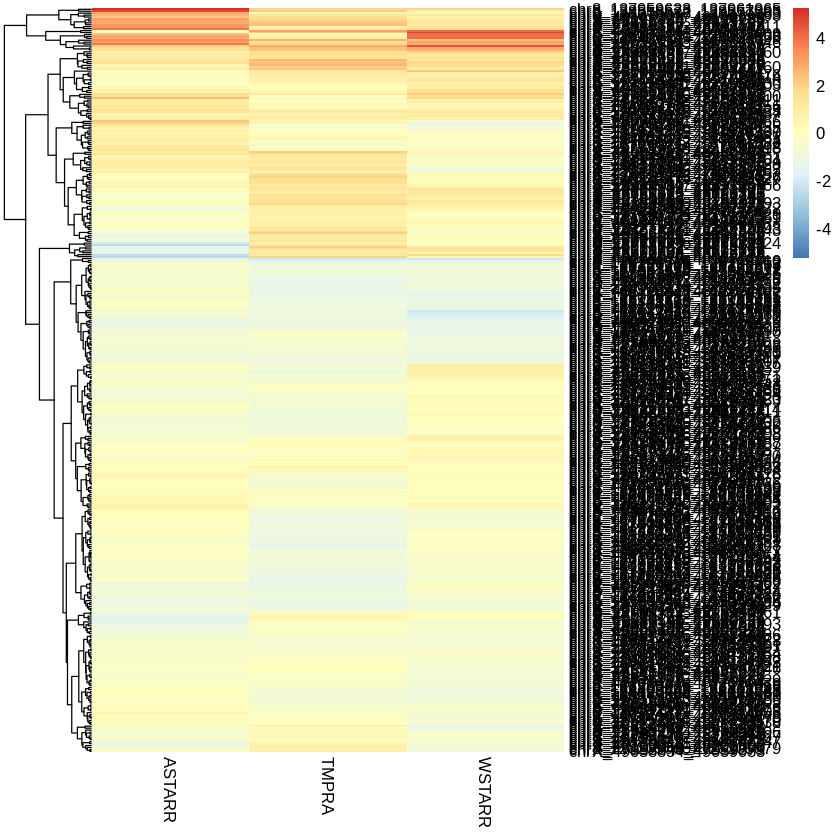

In [19]:
pheatmap(mat, scale = "column", cluster_cols = FALSE)

In [37]:
dat = dat_comb
dat = dat %>% 
    group_by(Label) %>% 
    summarize(
        Count  = n(),
        r_ASTARR_WSTARR = cor(ASTARR, WSTARR),
        r_TMPRA_ASTARR  = cor(TMPRA,  ASTARR),
        r_TMPRA_WSTARR  = cor(TMPRA,  WSTARR)
    )
dat

Label,Count,r_ASTARR_WSTARR,r_TMPRA_ASTARR,r_TMPRA_WSTARR
<chr>,<int>,<dbl>,<dbl>,<dbl>
CTCF,34,0.5644369,0.36803529,0.68868906
"CTCF-only,CTCF-bound",13,0.2588434,0.06159455,0.02157772
dELS,30,0.6882537,0.32493262,0.36113863
"dELS,CTCF-bound",9,0.6228578,0.40522406,0.80483466
DNase-H3K4me3,1,NA,NA,NA
DNase-only,12,0.5439181,0.67864447,0.82607876
Low-DNase,116,0.6494093,0.42189820,0.58690647
pELS,33,0.3178519,0.34993441,0.66131665
"pELS,CTCF-bound",8,0.2135687,-0.10857205,0.84574135


In [59]:
dat = dat_comb
dat = dat %>% 
    group_by(Label) %>% 
    summarize(
        Count  = n(),
        AW   = cor(ASTARR, WSTARR),
        TA   = cor(TMPRA,  ASTARR),
        TW   = cor(TMPRA,  WSTARR)
    ) %>% na.omit


fun_r2z = function(r){z = 0.5 * log((1+r) / (1-r)); return(z)}
fun_z2r = function(z){
    x = exp(2 * z)
    r = (x-1) / (x+1)
    return(r)
}

zc  = 1.96
dat = dat %>% 
    gather(Assay, r, -Label, -Count) %>% 
    mutate(z  = fun_r2z(r), SE = 1/((Count-3)^0.5)) %>%
    mutate(z_up = z + zc * SE, 
           z_dw = z - zc * SE) %>%
    mutate(r_up = fun_z2r(z_up),
           r_dw = fun_z2r(z_dw))

dat_cor = dat
dat

Label,Count,Assay,r,z,SE,z_up,z_dw,r_up,r_dw
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CTCF,34,AW,0.56443692,0.63932080,0.17960530,0.9913472,0.2872944071,0.7579362,0.279642689
"CTCF-only,CTCF-bound",13,AW,0.25884336,0.26486831,0.31622777,0.8846747,-0.3549381082,0.7087535,-0.340747615
dELS,30,AW,0.68825369,0.84463011,0.19245009,1.2218323,0.4674279366,0.8401938,0.436118795
"dELS,CTCF-bound",9,AW,0.62285782,0.72966086,0.40824829,1.5298275,-0.0705057929,0.9103951,-0.070389195
DNase-only,12,AW,0.54391812,0.60970317,0.33333333,1.2630365,-0.0436301613,0.8518991,-0.043602498
Low-DNase,116,AW,0.64940926,0.77427646,0.09407209,0.9586578,0.5898951708,0.7436776,0.529820209
pELS,33,AW,0.31785187,0.32925575,0.18257419,0.6871011,-0.0285896587,0.5961165,-0.028581872
"pELS,CTCF-bound",8,AW,0.21356866,0.21690759,0.44721360,1.0934462,-0.6596310554,0.7981325,-0.578117830
PLS,28,AW,0.46292439,0.50102692,0.20000000,0.8930269,0.1090269201,0.7128856,0.108596968


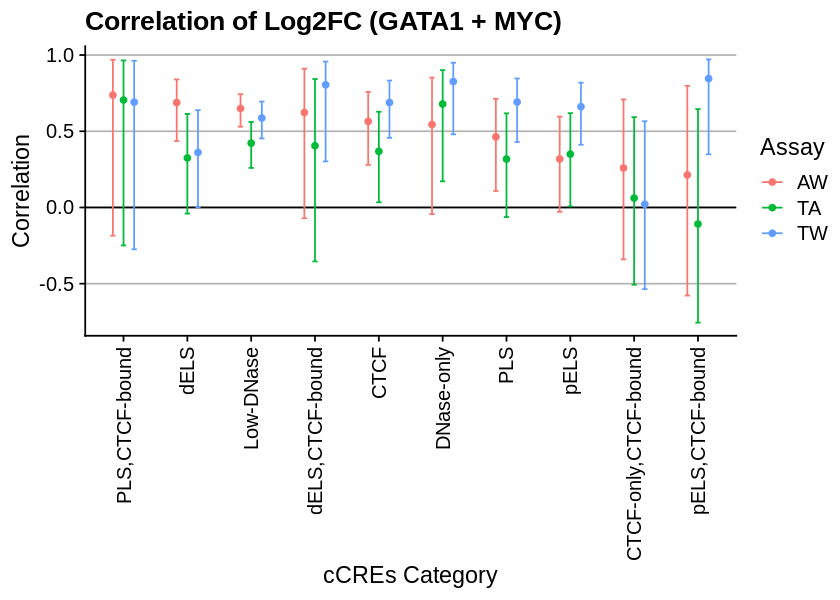

In [93]:
dat = dat_cor %>% dplyr::filter(Assay=="AW") %>% arrange(-r)
lab = dat$Label

dat = dat_cor
dat$Label = factor(dat$Label, levels = lab)

dodge = position_dodge(width=0.5)
gpt = ggplot(dat, aes(x=Label, y=r, fill=Assay, color=Assay)) + 
    geom_hline(yintercept = 0, color="black") +
    geom_point(position = dodge) +
    geom_errorbar(aes(ymin = r_dw, ymax = r_up), position = dodge, width = 0.25) + 
    
    labs(x="cCREs Category", y="Correlation", title="Correlation of Log2FC (GATA1 + MYC)") +
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90)) +
    theme(panel.grid.major.y = element_line(
        color = "grey70",
        size = 0.5,
        linetype = 1))

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

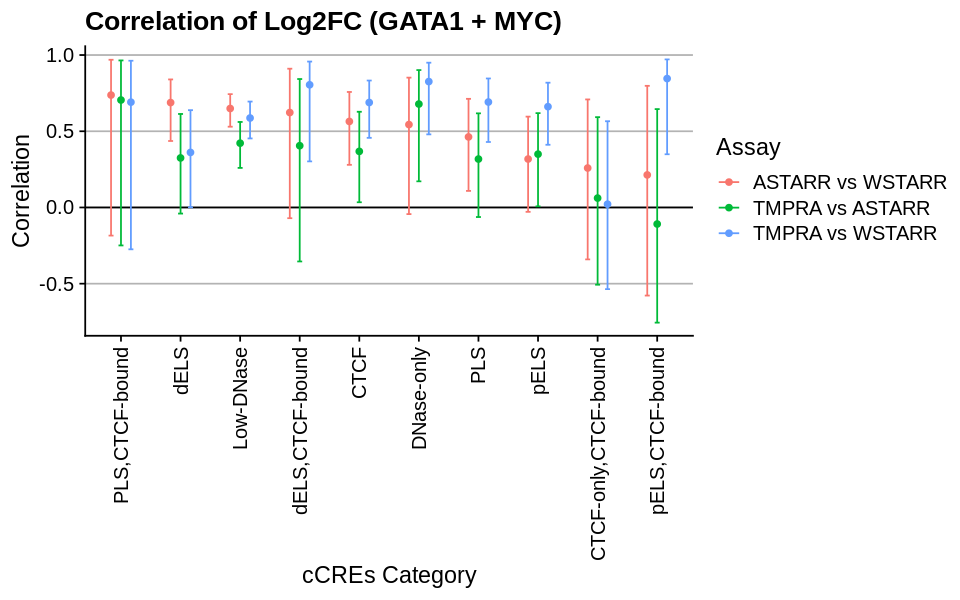

In [94]:



dat = dat_cor
dat$Label = factor(dat$Label, levels = lab)
dat$Assay = dplyr::recode(
    dat$Assay, 
    AW="ASTARR vs WSTARR", 
    TA="TMPRA vs ASTARR",
    TW="TMPRA vs WSTARR")

dodge = position_dodge(width=0.5)
gpt = ggplot(dat, aes(x=Label, y=r, fill=Assay, color=Assay)) + 
    geom_hline(yintercept = 0, color="black") +
    geom_point(position = dodge) +
    geom_errorbar(aes(ymin = r_dw, ymax = r_up), position = dodge, width = 0.25) + 
    
    labs(x="cCREs Category", y="Correlation", title="Correlation of Log2FC (GATA1 + MYC)") +
    theme_cowplot() + 
    theme(axis.text.x = element_text(vjust=0.5, hjust=1, angle=90)) +
    theme(panel.grid.major.y = element_line(
        color = "grey70",
        size = 0.5,
        linetype = 1))

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)